### Retrieve event, station and waveform data for the July 2019 Ridgecrest 7.1 event.

Information on the event can be found at https://www.scsn.org/index.php/2019/07/04/07-2019-ridgecrest-sequence/index.html

#### Pre-requisites

**obspy**

To install when running notebook locally  
``pip install obspy``  

To install when running on Colab  
``!pip install obspy``

In [1]:
# We will use obspy for this tutorial.

from obspy import UTCDateTime
from obspy.clients.fdsn import Client

In [2]:
# Connect to the SCEDC web services. 
# Use this connection for event, station and waveform web services

client = Client('SCEDC', debug=True)

Installed new opener with handlers: [<obspy.clients.fdsn.client.CustomRedirectHandler object at 0x7fd97fedc8e0>]
Base URL: http://service.scedc.caltech.edu
Request Headers: {'User-Agent': 'ObsPy/1.4.0 (Linux-4.18.0-425.3.1.el8.x86_64-x86_64-with-glibc2.28, Python 3.10.5)'}
Downloaded http://service.scedc.caltech.edu/fdsnws/dataselect/1/application.wadl with HTTP code: 200
Downloaded http://service.scedc.caltech.edu/fdsnws/station/1/application.wadl with HTTP code: 200
Downloaded http://service.scedc.caltech.edu/fdsnws/event/1/application.wadl with HTTP code: 200
Downloaded http://service.scedc.caltech.edu/fdsnws/event/1/catalogs with HTTP code: 200
Downloaded http://service.scedc.caltech.edu/fdsnws/event/1/contributors with HTTP code: 200
Discovered dataselect service
Discovered station service
Discovered event service
Storing discovered services in cache.


In [3]:
# First, retrieve event information

# set start and end times, we will use these throughout this tutorial

t1 = UTCDateTime('2019-07-04T00:00:00-07:00')
t2 = UTCDateTime('2019-07-05T20:21:00-07:00')

cat = client.get_events(starttime=t1, endtime=t2,
                        minmagnitude=7.0, catalog='SCEDC')

Downloaded http://service.scedc.caltech.edu/fdsnws/event/1/query?starttime=2019-07-04T07%3A00%3A00.000000&endtime=2019-07-06T03%3A21%3A00.000000&minmagnitude=7.0&catalog=SCEDC with HTTP code: 200


In [4]:
# Retrieve the lat and lon for the event

print(cat)
ev_lat,ev_lon = cat[0].preferred_origin().latitude, cat[0].preferred_origin().longitude

1 Event(s) in Catalog:
2019-07-06T03:19:53.040000Z | +35.770, -117.599 | 7.1  Mw | manual


In [5]:
# Next, retrieve closest CI stations for HH[ENZ] channels associated with this event

channels='HH*'
inv = client.get_stations(network="CI", channel=channels, 
                          lat=ev_lat, lon=ev_lon, 
                          minradius=0, maxradius=0.2, 
                          starttime=t1, endtime=t2, 
                          level='channel')
print(inv)

Downloaded http://service.scedc.caltech.edu/fdsnws/station/1/query?latitude=35.7695&longitude=-117.5993333&starttime=2019-07-04T07%3A00%3A00.000000&endtime=2019-07-06T03%3A21%3A00.000000&network=CI&channel=HH%2A&level=channel&minradius=0.0&maxradius=0.2 with HTTP code: 200
Inventory created at 2023-03-17T18:23:41.000000Z
	Created by: SCEDC WEB SERVICE: fdsnws-station | version: 1.1
		    http://service.scedc.caltech.edu/fdsnws/station/1/query?net=CI&cha=...
	Sending institution: SCEDC (SCEDC)
	Contains:
		Networks (1):
			CI
		Stations (4):
			CI.CLC (China Lake)
			CI.SRT (Snort)
			CI.TOW2 (Tower 2)
			CI.WRC2 (Renegade Canyon)
		Channels (12):
			CI.CLC..HHZ, CI.CLC..HHN, CI.CLC..HHE, CI.SRT..HHZ, CI.SRT..HHN, 
			CI.SRT..HHE, CI.TOW2..HHZ, CI.TOW2..HHN, CI.TOW2..HHE, CI.WRC2..HHZ
			CI.WRC2..HHN, CI.WRC2..HHE


In [6]:
# Get the list of station codes  

inv_stations = inv.get_contents()['stations']

inv_closest_ci_stations = ",".join([item.split(' ')[0].split('.')[-1] for item in inv_stations])
print(inv_closest_ci_stations)

CLC,SRT,TOW2,WRC2


In [7]:
# Retrieve the waveforms for the closest CI stations 

ev_waveforms = client.get_waveforms(network='CI', 
                                    station=inv_closest_ci_stations, 
                                    channel=channels, location='*', 
                                    starttime=t1, endtime=t2)

Downloaded http://service.scedc.caltech.edu/fdsnws/dataselect/1/query?starttime=2019-07-04T07%3A00%3A00.000000&endtime=2019-07-06T03%3A21%3A00.000000&network=CI&station=CLC%2CSRT%2CTOW2%2CWRC2&location=%2A&channel=HH%2A with HTTP code: 200


In [8]:
print(ev_waveforms)

12 Trace(s) in Stream:
CI.CLC..HHE  | 2019-07-04T06:59:59.998300Z - 2019-07-06T03:20:59.998300Z | 100.0 Hz, 15966001 samples
CI.CLC..HHN  | 2019-07-04T06:59:59.998300Z - 2019-07-06T03:20:59.998300Z | 100.0 Hz, 15966001 samples
CI.CLC..HHZ  | 2019-07-04T06:59:59.998300Z - 2019-07-06T03:20:59.998300Z | 100.0 Hz, 15966001 samples
CI.SRT..HHE  | 2019-07-04T06:59:59.998300Z - 2019-07-06T03:20:59.998300Z | 100.0 Hz, 15966001 samples
CI.SRT..HHN  | 2019-07-04T06:59:59.998300Z - 2019-07-06T03:20:59.998300Z | 100.0 Hz, 15966001 samples
CI.SRT..HHZ  | 2019-07-04T06:59:59.998300Z - 2019-07-06T03:20:59.998300Z | 100.0 Hz, 15966001 samples
CI.TOW2..HHE | 2019-07-04T06:59:59.998300Z - 2019-07-06T03:20:59.998300Z | 100.0 Hz, 15966001 samples
CI.TOW2..HHN | 2019-07-04T06:59:59.998300Z - 2019-07-06T03:20:59.998300Z | 100.0 Hz, 15966001 samples
CI.TOW2..HHZ | 2019-07-04T06:59:59.998300Z - 2019-07-06T03:20:59.998300Z | 100.0 Hz, 15966001 samples
CI.WRC2..HHE | 2019-07-04T06:59:59.998300Z - 2019-07-06T03:

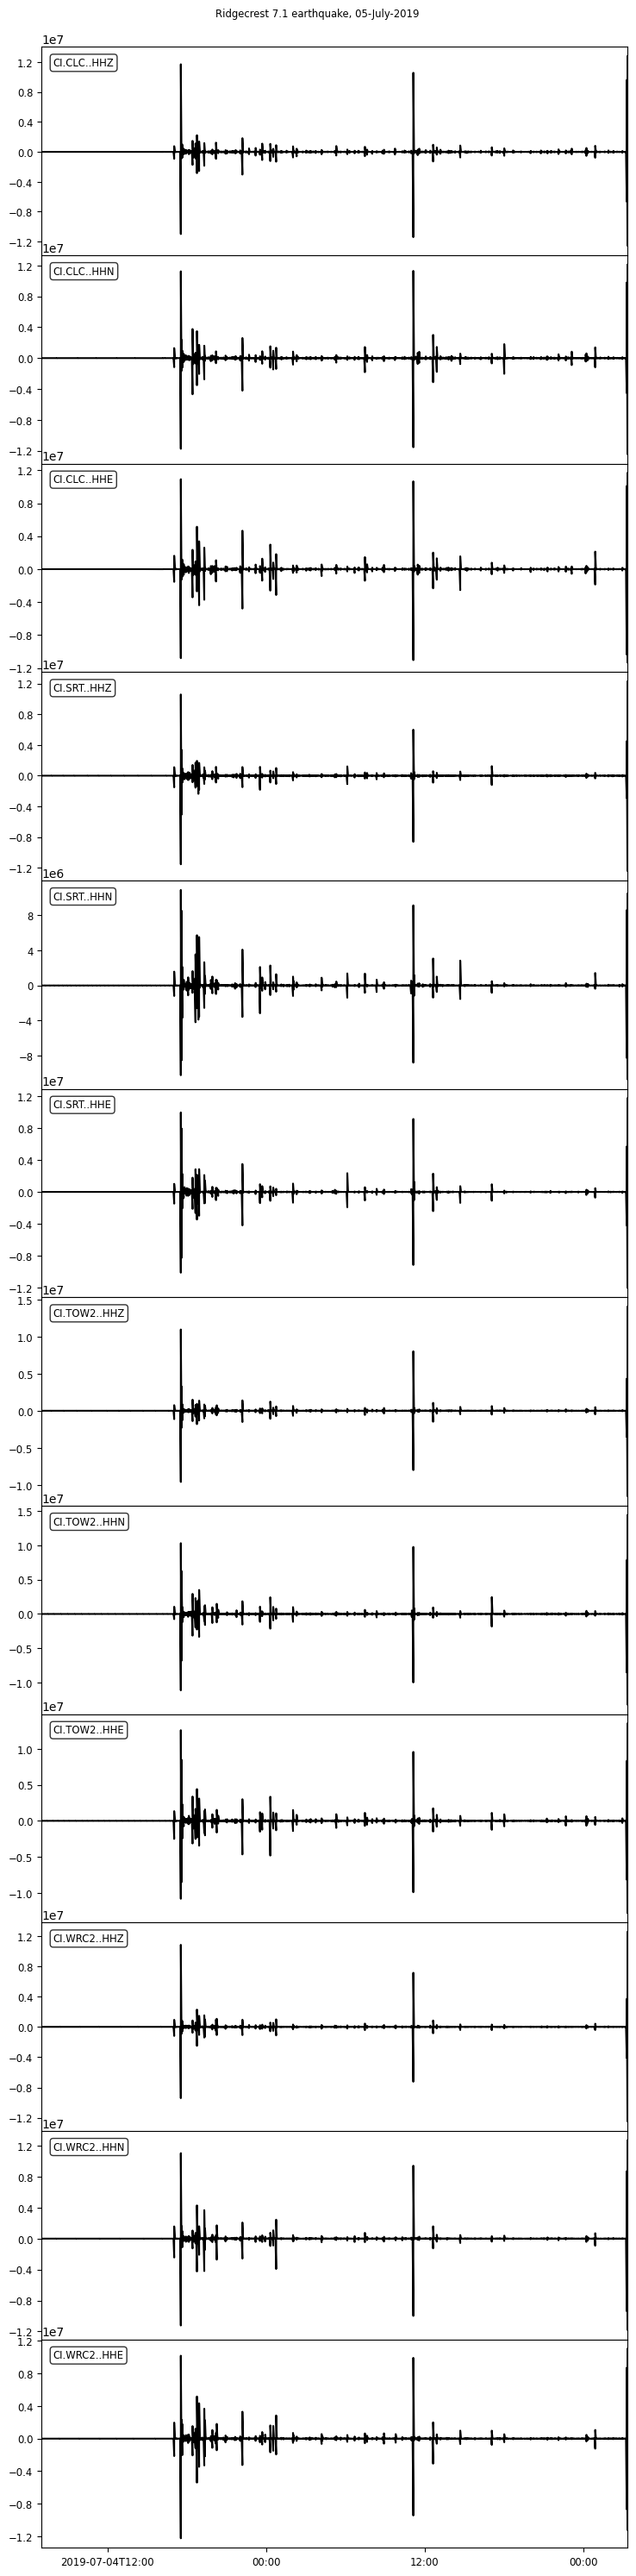

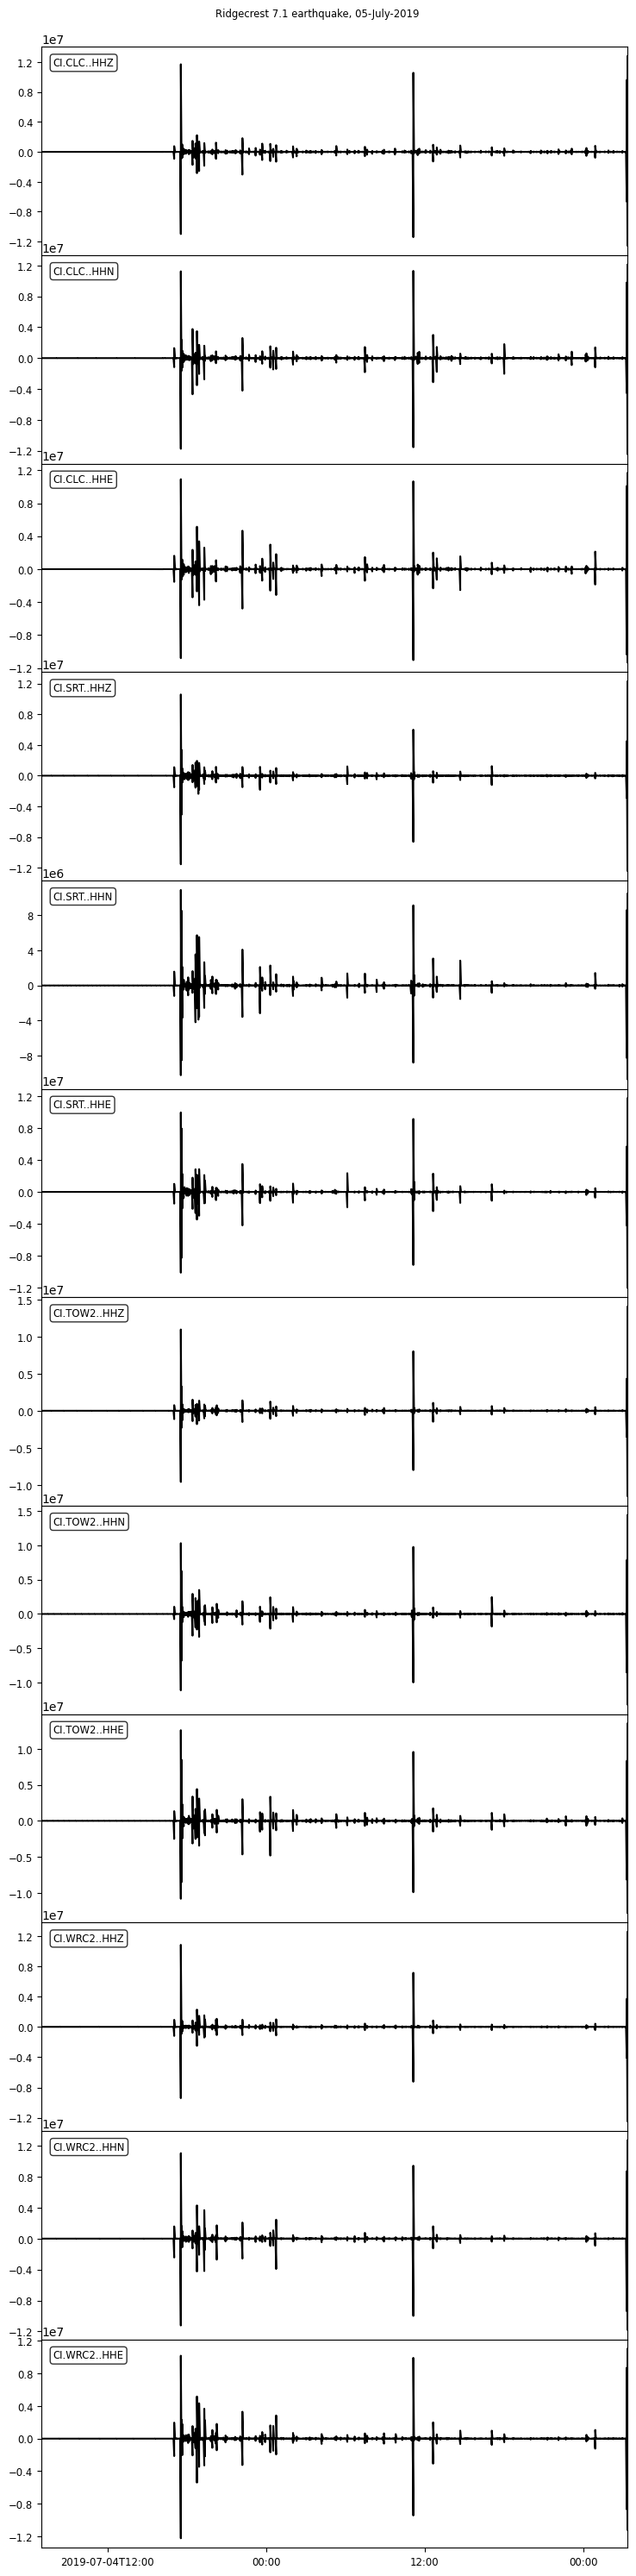

In [9]:
ev_waveforms.label='Ridgecrest 7.1 earthquake, 05-July-2019'
ev_waveforms.plot(equal_scale=False)